## Rolling & Expanding

### Rolling

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [11]:
# parse_dates=True : parse 가능하면 parse해서 보여줘라
df=pd.read_csv('../data/AAPL.csv', index_col="Date",parse_dates=True)

##1) parsing이 안되는 컬럼일 경우 에러나므로 파싱 가능한 컬럼을 리스트로 직접 지정해줄 수도 있음
#df=pd.read_csv('../data/AAPL.csv', index_col="Date",parse_dates=["Date"])

##2) 2019-01/01 >> parsing이 안되기 때문에 직접 함수를 만들어서 지정하는 방법 있음
# def dateparser(dt):
#     return pd.datetime.strptime(dt,"%Y-%m-%d")

# df=pd.read_csv('../data/AAPL.csv', index_col="Date",parse_dates=["Date"],date_parser=dateparser)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-29,100.589996,100.690002,98.040001,99.620003,93.514290,142718700
2014-10-06,99.949997,102.379997,98.309998,100.730003,94.556244,280258200
2014-10-13,101.330002,101.779999,95.180000,97.669998,91.683792,358539800
2014-10-20,98.320000,105.489998,98.220001,105.220001,98.771042,358532900
2014-10-27,104.849998,108.040001,104.699997,108.000000,101.380676,220230600
...,...,...,...,...,...,...
2018-03-05,175.210007,180.000000,174.270004,179.979996,179.979996,139852700
2018-03-12,180.289993,183.500000,177.619995,178.020004,178.020004,155417500
2018-03-19,177.320007,177.470001,164.940002,164.940002,164.940002,172670700


In [19]:
#window를 7개 짜리로 만들어서 이동하면서 7개씩 샘플링, aggregation함
df["Close"].rolling(7).mean()#7일치 종가 평균

<bound method NDFrame.tail of Date
2014-09-29           NaN
2014-10-06           NaN
2014-10-13           NaN
2014-10-20           NaN
2014-10-27           NaN
                 ...    
2018-03-05    170.362856
2018-03-12    171.292858
2018-03-19    171.927144
2018-03-26    173.551429
2018-03-29    172.887144
Name: Close, Length: 184, dtype: float64>

In [17]:
# 7일이 지나기 전에는 데이터가 다 안 차서 NaN으로 표시됨
df["Close"].rolling(7).mean().head()

Date
2014-09-29   NaN
2014-10-06   NaN
2014-10-13   NaN
2014-10-20   NaN
2014-10-27   NaN
Name: Close, dtype: float64

'\n주황색이 window 적용한 그래프.. 전체적인 트렌드를 살펴볼 수 있음\nwindow 사이즈가 커지면 데이터 앞단에서 실제를 반영하지 못하는 경우가 생김\n'

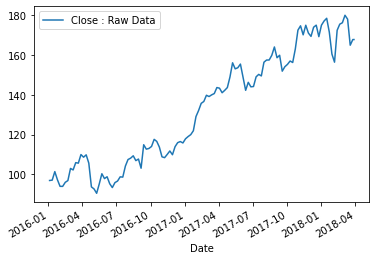

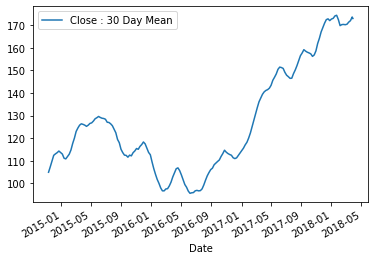

In [38]:
df['Close : Raw Data']=df['2016':]["Close"]
df['Close : 30 Day Mean']=df["Close"].rolling(window=7).mean()

df[['Close : Raw Data']].plot()
df[['Close : 30 Day Mean']].plot()
'''
주황색이 window 적용한 그래프.. 전체적인 트렌드를 살펴볼 수 있음
window 사이즈가 커지면 데이터 앞단에서 실제를 반영하지 못하는 경우가 생김
'''

### Expanding
    - 시점을 고정하고 period(=window)만큼 늘려가며 aggrgation
    - 누적 연산 개념

<AxesSubplot:xlabel='Date'>

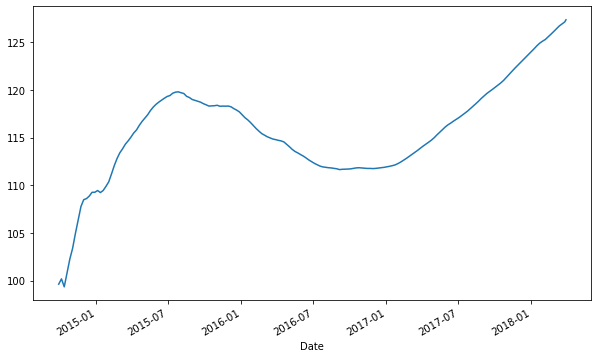

In [46]:
# 1단위씩 종가의 누적 평균
df["Close"].expanding(min_periods=1).mean().plot(figsize=(10,6))

<AxesSubplot:xlabel='Date'>

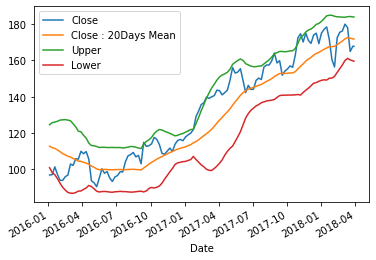

In [51]:
# 종가의 20일 단위의 평균 trend값, 종가의 20일 단위의 +-2*표준편차값
df["Close : 20Days Mean"]=df["Close"].rolling(window=20).mean()
df["Close : 20Days std"]=df["Close"].rolling(window=20).std()
df["Upper"]=df["Close : 20Days Mean"]+2*df["Close : 20Days std"]
df["Lower"]=df["Close : 20Days Mean"]-2*df["Close : 20Days std"]

df["2016":][["Close","Close : 20Days Mean","Upper","Lower"]].plot()